In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generamos datos para practicar

Vamos a armar datos falsos que tengan una periodicidad para practicar un poco

$datos (dias) = cos(2\pi \frac{1}{7} dias) + cos(2\pi \frac{4}{365} dias) + 0.0001(dias - 200)^2 + ruido $ 

Noten que hay 4 terminos sumando, dos variaciones periodicas (que da el coseno) una variacion cuadratica lenta y ruido aleatorio

In [9]:
# 
t = pd.date_range(start='2000-01-01', end='2000-12-31') # Generamos un rango de fechas entre 1 de enero y 31 de diciembre
t

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2000-12-22', '2000-12-23', '2000-12-24', '2000-12-25',
               '2000-12-26', '2000-12-27', '2000-12-28', '2000-12-29',
               '2000-12-30', '2000-12-31'],
              dtype='datetime64[ns]', length=366, freq='D')

In [13]:
days = t.dayofyear
days

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            357, 358, 359, 360, 361, 362, 363, 364, 365, 366],
           dtype='int64', length=366)

In [8]:
y = np.cos(days / 7 * 2 * np.pi) - 0.0001 * (days-200) ** 2 + 10 + np.sin(days / 365 * 4 * 2 * np.pi) + 0.8 * np.random.randn(len(t))
serie = pd.Series(index=t, data=y)

# Ej de repaso

## Ej 1

Grafiquen la serie en funcion del tiempo

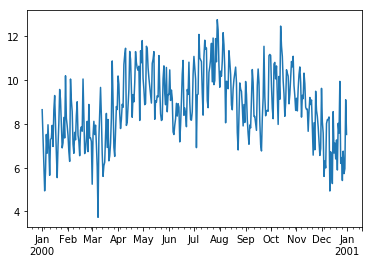

In [28]:
serie.plot()

## Ej 2

¿Que evolucion en el tiempo observan? Grafiquen la tendencia global general de los datos

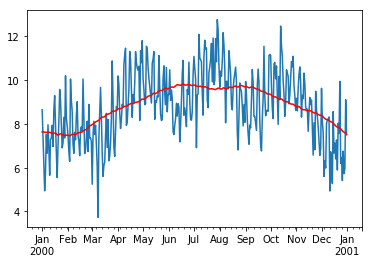

In [32]:
ax = serie.plot()
tendencia = serie.rolling(100, min_periods=1, center=True).mean()
tendencia.plot(color='r')

## Ej 3
Quiten la tendencia global de los datos ¿Que niveles de periodicidad observan? 

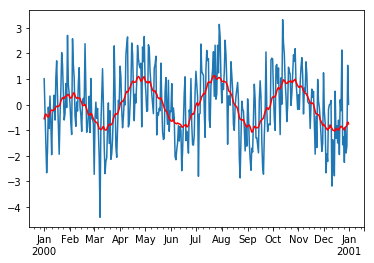

In [41]:
sin_tendencia = serie - tendencia
ax = sin_tendencia.plot()
tendencia2 = sin_tendencia.rolling(30, min_periods=1, center=True).mean()
tendencia2.plot(ax=ax, color='r')

## Ej 4

Quiten tambien esa componente periodica de los datos ¿Observan algun otro comportamientio periodico?

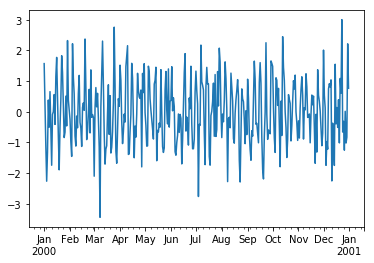

In [42]:
sin_tendencia2 = sin_tendencia - tendencia2 
sin_tendencia2.plot()

## Ej 5
Hagan un grafico del promedio de la serie para cada dia de la semana

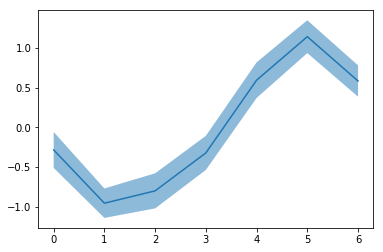

In [52]:
prom = sin_tendencia2.groupby(sin_tendencia2.index.dayofweek).mean()
sem = sin_tendencia2.groupby(sin_tendencia2.index.dayofweek).sem()
plt.plot(prom)
plt.fill_between(prom.index, prom - 2*sem, prom + 2*sem, alpha=0.5)


# Estadistica

In [53]:
df = pd.read_csv('declaraciones_sample.csv')

In [54]:
df.head()

,total_bienes_final,total_bienes_inicio
0,1199800.21,1006935.79
1,505177.06,434454.75
2,2862043.30,2275473.29
3,2225806.97,1600085.00
4,261076.55,256931.00


In [55]:
# Estadistica basica
df.describe()

,total_bienes_final,total_bienes_inicio
count,1.000000e+04,1.000000e+04
mean,1.396782e+06,9.998973e+05
std,4.642415e+06,3.258374e+06
min,0.000000e+00,0.000000e+00
25%,3.266429e+05,2.553542e+05
50%,7.112650e+05,5.077120e+05
75%,1.485695e+06,1.080271e+06
max,2.254897e+08,1.507560e+08


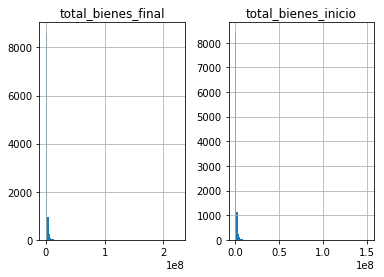

In [56]:
df.hist(bins=100);

Por que no se ve nada en este grafico?

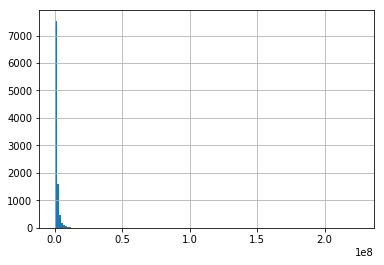

In [59]:
df.total_bienes_final.hist(bins=150);


Es una distribucion con colas largas

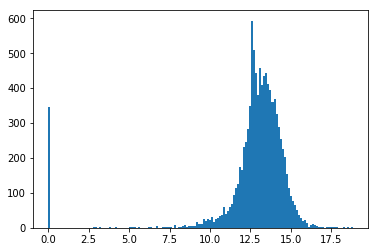

In [60]:
log_inicio = np.log(df.total_bienes_inicio + 1)
log_final = np.log(df.total_bienes_final + 1)
plt.hist(log_inicio, bins=150);

¿Que cosas llaman la atencion de este grafico?

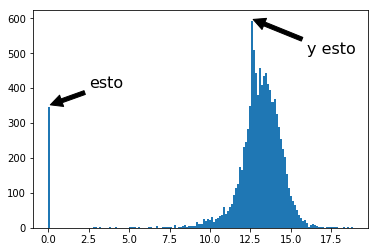

In [61]:
plt.hist(log_inicio, bins=150);
plt.annotate('esto', xy=(0, 350), xytext=(2.5, 400),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=16
            )

plt.annotate('y esto', xy=(12.5, 600), xytext=(16, 500),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=16
            );


## Ej

Prueben que filtrando los valores cero desaparece el pico de la izquierda

In [163]:
# Ej 



¿y el otro? Miremos con mas detalle

(7.5, 17.5)

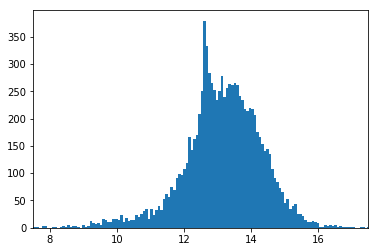

In [62]:
plt.hist(log_inicio, bins=250);
plt.xlim(7.5, 17.5)


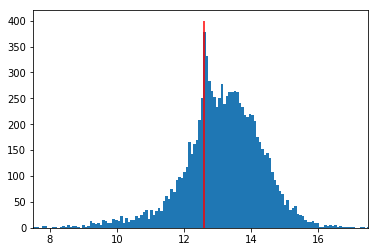

In [63]:
# Agregemos el limite de bienes personales
plt.hist(log_inicio, bins=250);
plt.xlim(7.5, 17.5)
plt.vlines(np.log(3e5), 0, 400, 'r')

¿Es representativo el promedio?

In [190]:
np.mean(df.total_bienes_inicio > df.total_bienes_inicio.mean())

0.2732

¿Como se comparan los valores al inicio y al final?

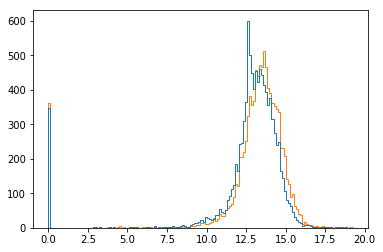

In [211]:
plt.hist([log_inicio, log_final], bins=150, histtype='step');

# Relaciones entre variables

## Correlacion

OJO Correlacion no implica causalidad

In [66]:
np.corrcoef(r1,r2)

array([[1.        , 0.98257329],
       [0.98257329, 1.        ]])

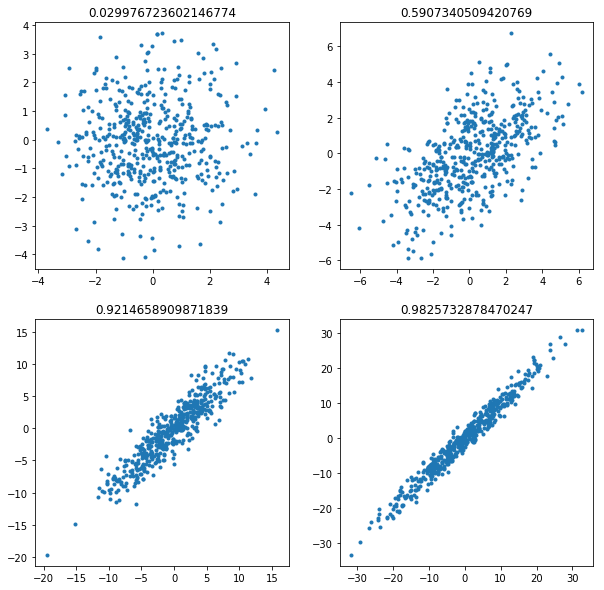

In [65]:
# Generemos datos para explorar la correlacion
plt.figure(figsize=(10,10))
for i, m in enumerate([1,2,5,10]):
    x = np.random.randn(500)*m
    y = np.random.randn(500)
    r1 = x + y 
    r2 = x - y
    plt.subplot(2,2,i+1)
    plt.plot(r1,r2,'.')
    C = np.corrcoef(r1,r2) # Aca se calcula el coeficiente de correlacion
    plt.title(C[0,1])
    


¿Que pasa si la relacion no es lineal?


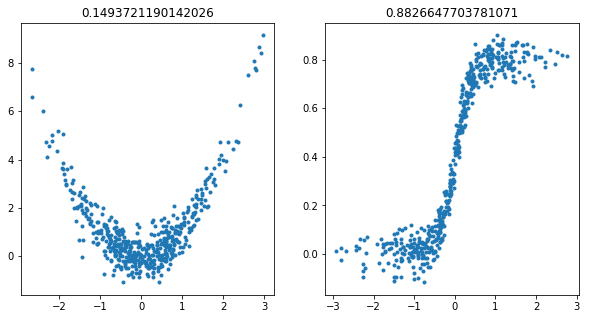

In [67]:
plt.figure(figsize=(10,5))
x = np.random.randn(500)
y = x**2 + np.random.randn(500)*0.5
plt.subplot(1,2,1)
plt.plot(x,y,'.')
C = np.corrcoef(x,y)
plt.title(C[0,1]);

x = np.random.randn(500)
y = .8/(1 + np.exp(-x*5)) + np.random.randn(500)*0.05
plt.subplot(1,2,2)
plt.plot(x,y,'.')
C = np.corrcoef(x,y)
plt.title(C[0,1]);


## Ajustes de polinomios
Supongamos que observamos una relacion entre dos variables

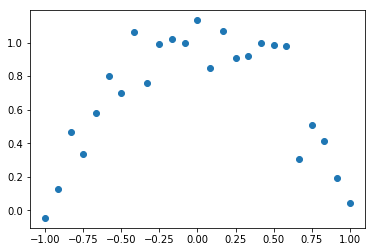

In [71]:
# Ejemplo de lo que queremos hacer

# Datos falsos
Npoints=25
x = np.linspace(-1,1,Npoints)
y = -x**2 + 1 + np.random.randn(len(x))*0.1
plt.plot(x, y, 'o')

<Figure size 432x288 with 0 Axes>

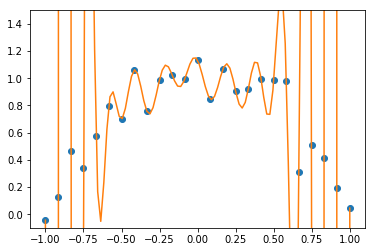

<Figure size 432x288 with 0 Axes>

In [72]:
# Un ajuste con Npoint parametros
xx = np.linspace(-1,1,100)
pp = np.polyfit(x, y, Npoints-1)
yy = np.polyval(pp, xx)
plt.plot(x,y,'o',xx,yy)
plt.xlim((-1.1,1.1))
plt.ylim((-0.1,1.5))
plt.figure()

(-0.1, 1.5)

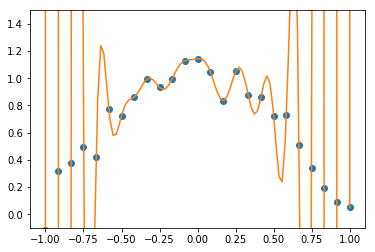

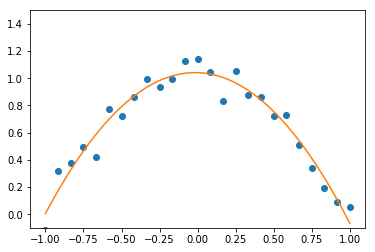

In [325]:
# Un ajuste con 2 parametros
xx = np.linspace(-1,1,100)
pp = np.polyfit(x,y,2)
yy = np.polyval(pp, xx)
plt.plot(x,y,'o',xx,yy)
plt.xlim((-1.1,1.1))
plt.ylim((-0.1,1.5))

### Separacion en Train y Test

In [76]:
print(i_train)
print(i_test)

[ 1  3  5  7  9 11 13 15 17 19 21 23]
[ 0  2  4  6  8 10 12 14 16 18 20 22 24]


[-52.71849646   4.79223074 108.84468764  -4.67814005 -72.62056141
  -2.14311265  14.69428635   2.83634728  -0.2745626   -0.44953393
   0.92391996]


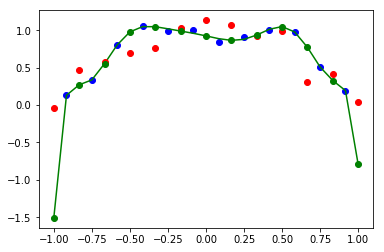

In [88]:
grado = 10

pp = np.polyfit(x[i_train], y[i_train], grado)
print(pp)

plt.plot(x[i_train], y[i_train], 'bo')
y_eval = np.polyval(pp,x)
plt.plot(x, y_eval, 'g')
plt.plot(x[i_test], y[i_test], 'ro')
y_estimado = np.polyval(pp, x[i_test])
plt.plot(x[i_test], y_estimado, 'go')




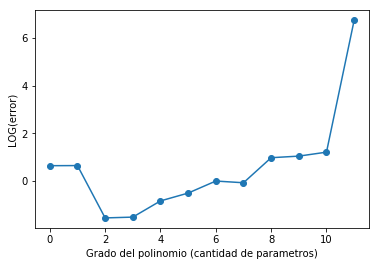

In [89]:
i_test = np.arange(0,len(x),2)
i_train = np.arange(1,len(x),2)

errores = []
for grado in range(len(i_train)):
    
    pp = np.polyfit(x[i_train], y[i_train], grado)
    y_estimado = np.polyval(pp, x[i_test])
    error = np.sum((y[i_test] - y_estimado)**2)
    errores.append(error)
plt.plot(np.log(errores),'o-') # Vemos que el mejor valor es 2 (escala logartimica)
plt.xlabel('Grado del polinomio (cantidad de parametros)')
plt.ylabel('LOG(error)');

## Ej
Calculen el error de entrenamiento y muestren que solo disminuye

# Algo de datos geograficos

In [4]:
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline

In [2]:
base = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


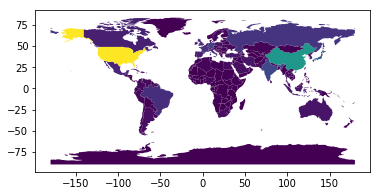

In [5]:
base.plot('gdp_md_est')

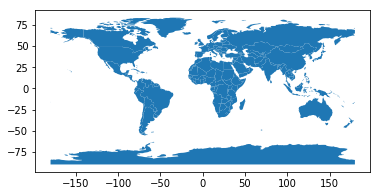

In [6]:
base.plot()

In [100]:
df = pd.read_csv('./bibliotecas-populares.csv')
df.head()

,espacio_cultural_id,provincia_id,localidad_id,provincia,localidad,nombre,direccion,codigo_postal,codigo_indicativo_telefono,telefono,mail,informacion_adicional,latitud,longitud,fuente,numero_de_registro_en_conabip
0,110001,38,38063180,Jujuy,San Pedro de Jujuy,Biblioteca Pública Popular y Escolar Ernesto S...,Miguel Araoz 220,4500,0884,20303,bibernestosabato@hotmail.com,Se fundó en el año 1930,-24.234450,-64.868900,CONABIP,2699
1,110002,6,6413050,Buenos Aires,Junín,Biblioteca Popular Paz y trabajo,Primera Junta 301,6000,0362,20625,s/d,Se fundó en el año 1923,-34.582617,-60.935967,CONABIP,1054
2,110003,6,6623100,Buenos Aires,Pergamino,Biblioteca Popular Tec. Manuel Belgrano,Av.Roca 1425,2700,0477,23649,s/d,Se fundó en el año 1958,-33.889817,-60.581250,CONABIP,2753
3,110004,6,6210020,Buenos Aires,Chacabuco,Biblioteca Popular Domingo Faustino Sarmiento,San Martín 38,6470,0352,27094,biblioteca@cech.com.ar,Se fundó en el año 1907,-34.642150,-60.470367,CONABIP,1381
4,110005,46,46014010,La Rioja,La Rioja,Biblioteca Popular Juan Ramirez de Velazco,Av.Perón 820,5300,0822,27805,bibliotecavelasco@gmail.com,Se fundó en el año 1956,-29.423250,-66.861017,CONABIP,2687


In [102]:
df['coordenadas'] = list(zip(df.longitud, df.latitud))
df['coordenadas'] = df['coordenadas'].apply(Point)
bibliotecas = gpd.GeoDataFrame(df, geometry='coordenadas')

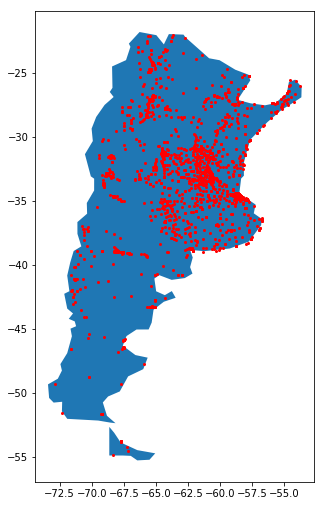

In [103]:
ax = base[base.name == 'Argentina'].plot(figsize=(5,10))

bibliotecas.plot(ax=ax, color='r', markersize=4)

# Algo de Machine Learning

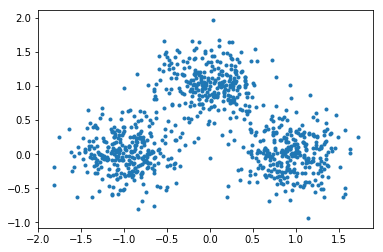

In [104]:
# Generamos 3 grupos de datos distintos
# Definimos 3 centros:
centros = ((-1, 0), (1, 0), (0, 1))

Npuntos = 300
Ngrupos = len(centros)
todos_juntos = []
for centro in centros:
    x = np.random.randn(Npuntos)*0.3 + centro[0]
    y = np.random.randn(Npuntos)*0.3 + centro[1]
    puntos = np.vstack((x,y)).T
    todos_juntos.append(puntos)
todos_juntos = np.vstack(todos_juntos)
plt.plot(todos_juntos[:,0], todos_juntos[:,1],'.')

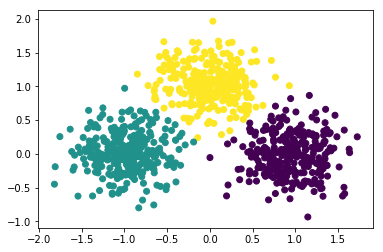

In [105]:
# Clustering
from sklearn.cluster import MeanShift

ms = MeanShift(bandwidth=0.5)
ms.fit(todos_juntos)

plt.scatter(todos_juntos[:,0], todos_juntos[:,1], c=ms.labels_)
